# PROJECT 18 - 문자를 읽을 수 있는 딥러닝

## [배경지식]

### OCR (Optical Character Recognition, 광학 문자 인식)
OCR 이란 빛을 이용해서 문자를 인식하는 기술을 말한다.  
OCR 기술의 활용 사례로는 우편번호 추출을 통한 우편물 관리, 자동차 번호판 인식, 모바일 기기를 사용한 명함 인식, 신용카드 읽기를 이용한 결제 서비스 등이 있다.

### 어떻게 기계가 읽을 수 있을까?
1. 문자의 존재를 **Detection** (인식) 하고,  
2. 어떤 문자인지 **Recognition** (판독) 한다.

### 어떤 과정으로 읽을까?
1. **Text Detection** (문자검출) : 입력받은 사진 속에서 문자의 위치를 찾아냅니다.  
2. **Text Recognition** (문자인식) : 찾은 문자 영역으로부터 문자를 읽어냅니다.

예를 들어 아래 카카오의 OCR 모델은 먼저 문자가 있는 영역의 정보(coord) 를 찾아내고, 각 영역에서 문자를 인식하고 있습니다. 이렇게 문자 인식 모델은 Text Detection 과 Text Recognition 두 과정을 통해서 사진 속의 문자를 읽을 수 있게 됩니다.  

![OCR_kakao](image/OCR_kakao.png)
*(출처: https://brunch.co.kr/@kakao-it/318)*

### 사진속 문자 찾아내기 - Detection
사진 속 문자를 찾아내는 딥러닝 모델은 일반적인 Object Detection(객체 인식) 방법으로 접근합니다.  

![detection](image/detection.png)
*(출처: https://www.semanticscholar.org/paper/End-To-End-Text-Detection-Using-Deep-Learning-Ibrahim/6d8584a900bd77afec55921c2d2d1cb6f1244b25/figure/0)*

### 사진 속 문자 읽어내기 - Recognition
이미지 내의 문자 인식 모델의 기본적인 방법 중 하나는 CNN 과 RNN 을 결합한 CRNN 모델입니다. 이미지 내의 텍스트와 연관된 특징을 CNN 을 통해 추출한 후에 스텝단위의 문자 정보를 RNN 으로 인식합니다.  

![recognition](image/recognition.png)
*(출처: Ibrahim, Ahmed Sobhy Elnady. End-To-End Text Detection Using Deep Learning. Diss. Virginia Tech, 2017. (https://arxiv.org/abs/1507.05717))*

Google OCR API, kears-ocr, Tesseract 이 3가지 OCR 기능을 활용하여 프로젝트를 진행해보도록 하겠습니다.

저는 메뉴판을 인식하는 프로젝트를 해보도록 하겠습니다.

## 1. 데이터셋 준비하기

우선 어떤 모델이 메뉴판 인식을 잘 하는지 확인하기 위해서 각 모델별로 한장의 이미지로만 OCR 을 해보도록 하겠습니다.

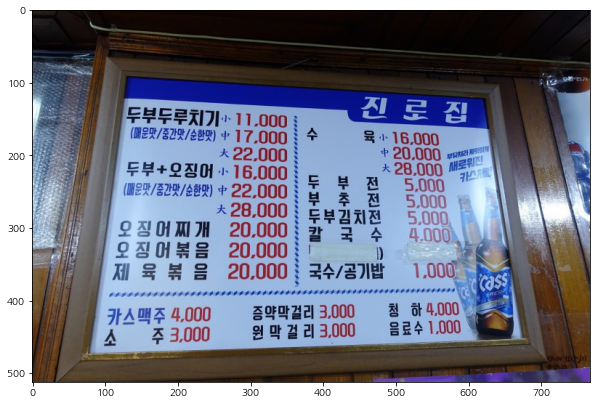

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import matplotlib.patches as patches
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


img_path = os.getenv('HOME')+'/aiffel/ocr_python/img'
img_test = img_path + '/5_진로집.jpeg'

plt.figure(figsize=(10,10))
plt.imshow(img.imread(img_test))
plt.show()

## 2. Google OCR API 

Google Clouod Vision 은 2016년 구글에서 공개한 기계 학습 기반 이미지 인식 API 입니다.  
Vision API 는 사실 이미지에서 텍스트를 추출하기 위한 전용 기술은 아니지만,  
이미지에 대한 다양한 처리를 수행하며, 그 중에서 텍스트 추출은 그 기능의 일부분으로 보시면 됩니다.

In [2]:
import os, io

def detect_text(path):
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations

    img_dict = {}
    for i, text in enumerate(texts):
        if i == 0:
            continue
        
        vertices = tuple([(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])
        img_dict[vertices] = text.description
        # print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
        
    return img_dict

In [3]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
img_dict = detect_text(img_test)

for key, value in img_dict.items():
    print(f'{value}')

-rw-rw-r-- 1 aiffel-dj41 aiffel-dj41 2349  3월 16 09:08 /home/aiffel-dj41/aiffel/ocr_python/my_google_api_key.json
진로
집
두부
두루
치기
11.000
(
매운맛
/
중간
맛
/
순한
맛
)
+
17,000
수
치
22,000
두부
+
오징어
·
,
16,000
(
매운맛
/
중간
맛
/
순한
맛
)
+
22,000
부
추
전
*
28,000
두부
김치전
오징어
찌개
20.000
칼
국
수
오징어
볶음
20.000
제육
볶음
20,000
국수
/
공기밥
육
16,000
+20.000
*
28,000
새로
워진
두
부
전
카스
5.000
5.000
5.000
4.000
1.000
Sse
ERESH
카스
맥주
4.000
소
주
3,000
증약
막걸리
3,000
원
막걸리
3,000
청
하
4.000
음료수
1,000


## 3. kears-ocr

keras-ocr 은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR 을 할 수 있게 해줍니다.

문자 인식모델은 CRNN 을 사용하고, 검출 모델은 CRAFT 를 사용합니다.  
- Detection Model : CRAFT (개별 글자 기반 검출)
- Recognition Model : CRNN (CNN + RNN)

pipline 변수에 이미지를 몇 개 넣어줍니다. 이미지소스의 url 을 사용합니다.

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj41/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel-dj41/.keras-ocr/crnn_kurapan.h5


In [5]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
# image_urls = [
#  'https://source.unsplash.com/M7mu6jXlcns/640x460',
#  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
#  'https://source.unsplash.com/98uYQ-KupiE',
#  'https://source.unsplash.com/j9JoYpaJH3A',
#  'https://source.unsplash.com/eBkEJ9cH5b4'
#]

# images = [ keras_ocr.tools.read(url) for url in image_urls]
# prediction_groups = [pipeline.recognize([url]) for url in image_urls]
images = [keras_ocr.tools.read(img_test)]
prediction_groups = pipeline.recognize([img_test])

keras_ocr 은 내부적으로 검출기와 인식기를 두고, 검출기로 바운딩 박스를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 합니다.

인식된 결과를 pyplot 으로 시각화합니다.

/home/aiffel-dj41/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


<AxesSubplot:>

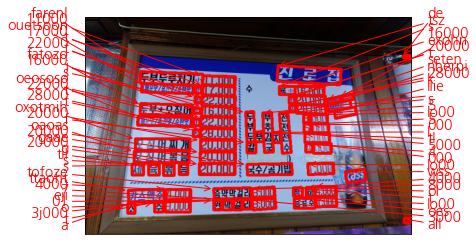

In [6]:
# Plot the predictions
# fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
# for idx, ax in enumerate(axs):
    # keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    # predictions=prediction_groups[idx][0], ax=ax)

fig, ax = plt.subplots()
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0], ax=ax)

## 4. Tesseract

테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리입니다.

### Text Detection
테서랙트로 문자검출을 하고 이미지를 자르도록 하겠습니다.  
테서랙트를 사용하면 한 번에 이미지 내의 문자 검출과 인식을 할 수 있습니다.  
먼저 OCR 이 이뤄지는 전체과정을 직접 거쳐보기 위해 검출을 먼저 해보도록 하겠습니다.

In [7]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.jpeg")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

# work_dir = os.getenv('HOME')+'/aiffel/ocr_python/img'
# img_file_path = work_dir + '/광천식당.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_test, img_path)

/home/aiffel-dj41/aiffel/ocr_python/img/0000.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0001.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0002.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0003.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0004.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0005.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0006.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0007.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0008.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0009.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0010.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0011.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0012.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0013.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0014.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0015.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0016.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0017.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0018.jpeg
/home/aiffel-dj41/aiffel/ocr_python/img/0019.jpeg


위의 crop_word_regions() 함수는 테스트 이미지를 받아서, 문자 검출을 진행한 후, 검출된 문자 영역을 crop 한 이미지로 만들어서 그 파일들의 리스트를 리턴하는 함수입니다.  

### Text Recognition
테서랙트로 잘린 이미지에서 단어를 인식하도록 하겠습니다.  
검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결과값으로 나오는 image_to_string() 을 사용하게 됩니다.

In [8]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

스

28.)

7


개

이) [)(](]

^

매스

요 뿌 -  :

41)0)

으

나

마걱리

31)

2

스

1 [)[)!)

위

마

거 근

|

31 |)


Done


## 5. 모델 비교

Google OCR API, keras-ocr, Tesseract 이 3가지 모델을 사용해 봤을때, Google OCR API 가 메뉴판을 가장 잘 인식한다.  
keras-ocr 는 우선 한글을 인식을 못해서 사용할 수 없다.  
Tesseract 는 한글을 인식하기는 하지만 전체적으로 한글을 인식한 개수가 너무 적다.  
모든걸 고려해봤을때, 한글 메뉴판을 인식하는 것은 **Google OCR API** 모델이 가장 적합한 것 같다.

## 6. 한글 메뉴판 인식하기

### 데이터셋 준비하기
대전식당의 메뉴판 8개 이미지를 준비합니다.

In [15]:
img_path = os.getenv('HOME')+'/aiffel/ocr_python/img/'
img_list = os.listdir(img_path)

print(img_list)

['5_진로집.jpeg', '6_소울카츠.jpeg', '1_갈마살롱.jpg', '2_스바라시라멘.jpeg', '4_설해돈.jpeg', '7_동백카츠.jpg', '3_까스만.jpeg', '8_도군샤브.jpeg']


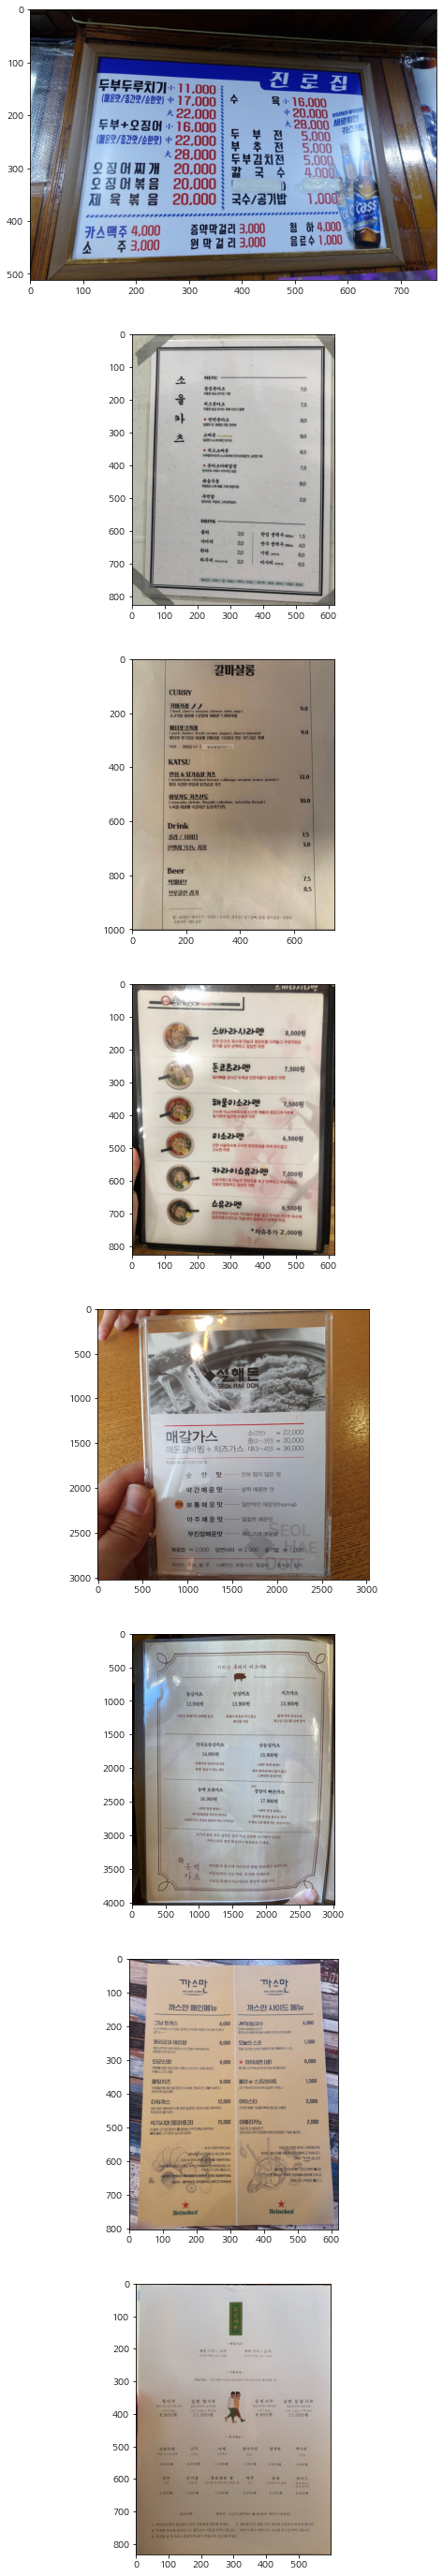

In [16]:
plt.figure(figsize = (50, 50))

for i in range(len(img_list)):
    plt.subplot(len(img_list), 1, i+1)
    plt.imshow(img.imread(img_path + img_list[i]))
    
plt.show()

### Google OCR API 사용하기

기존에 작성한 detext_text 함수를 활용하여 이미지에서 글자를 추출한 후, 추출한 글자가 적혀있는 새로운 이미지를 생성합니다.

**진로집**

In [82]:
img_dict = detect_text(img_path + img_list[0])

In [83]:
white_img = img.imread(img_path + img_list[0])
white_img = np.ones(img.imread(img_path + img_list[0]).shape)

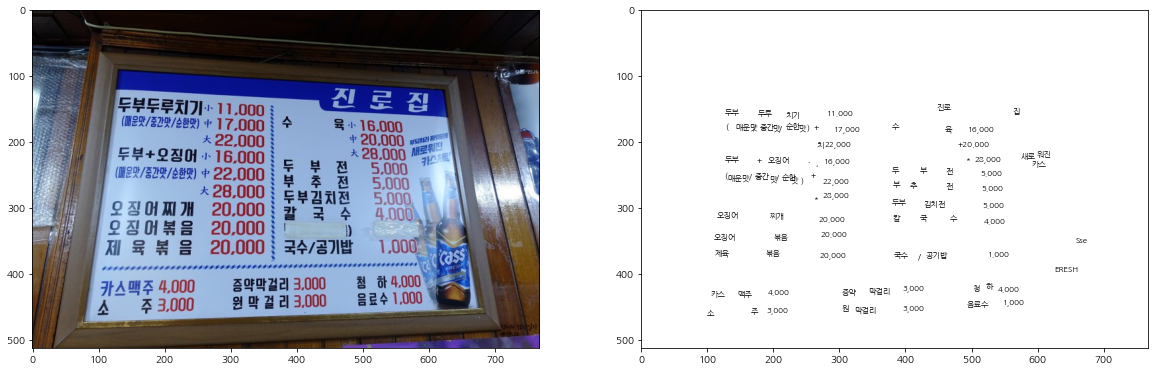

In [85]:
plt.figure(figsize = (20, 30))

plt.subplot(1, 2, 1)
plt.imshow(img.imread(img_path + img_list[0]))

plt.subplot(1, 2, 2)
plt.imshow(white_img)
for key, val in img_dict.items():
    plt.text(key[3][0], key[3][1], val, fontsize=8)
    
plt.show()

**소울카츠**

In [73]:
img_dict = detect_text(img_path + img_list[1])

In [74]:
white_img = img.imread(img_path + img_list[1])
white_img = np.ones(img.imread(img_path + img_list[1]).shape)

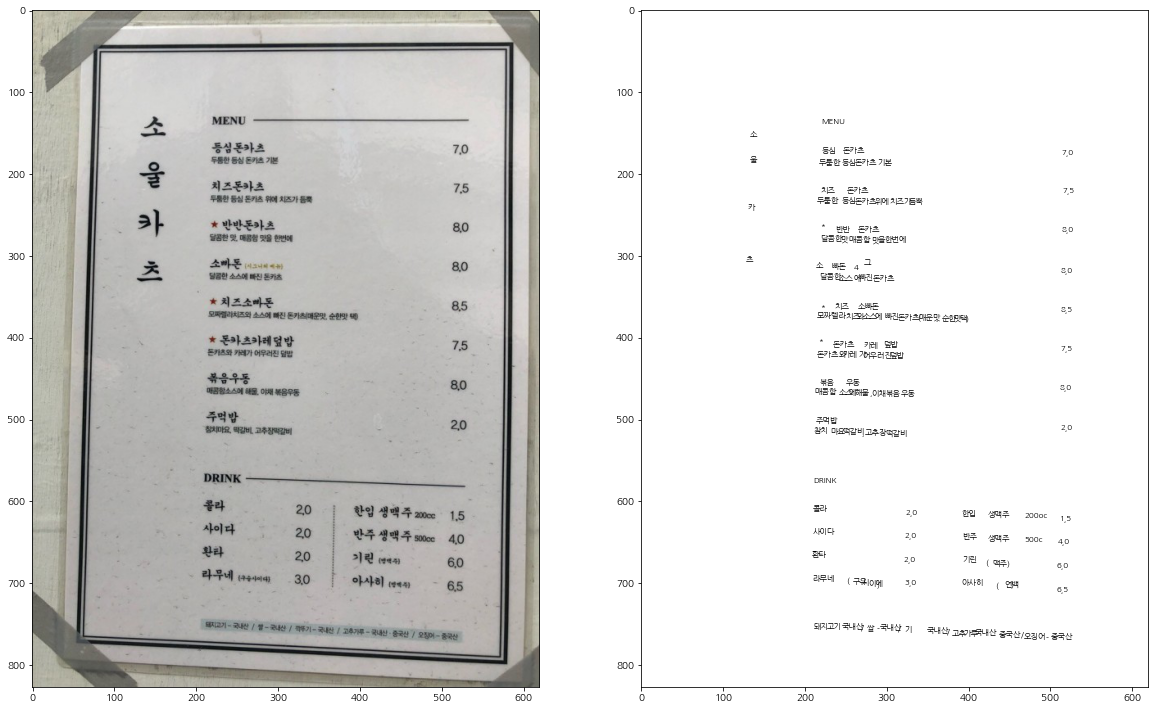

In [75]:
plt.figure(figsize = (20, 30))

plt.subplot(1, 2, 1)
plt.imshow(img.imread(img_path + img_list[1]))

plt.subplot(1, 2, 2)
plt.imshow(white_img)
for key, val in img_dict.items():
    plt.text(key[3][0], key[3][1], val, fontsize=8)
    
plt.show()

**갈마살롱**

In [76]:
img_dict = detect_text(img_path + img_list[2])

In [77]:
white_img = img.imread(img_path + img_list[2])
white_img = np.ones(img.imread(img_path + img_list[2]).shape)

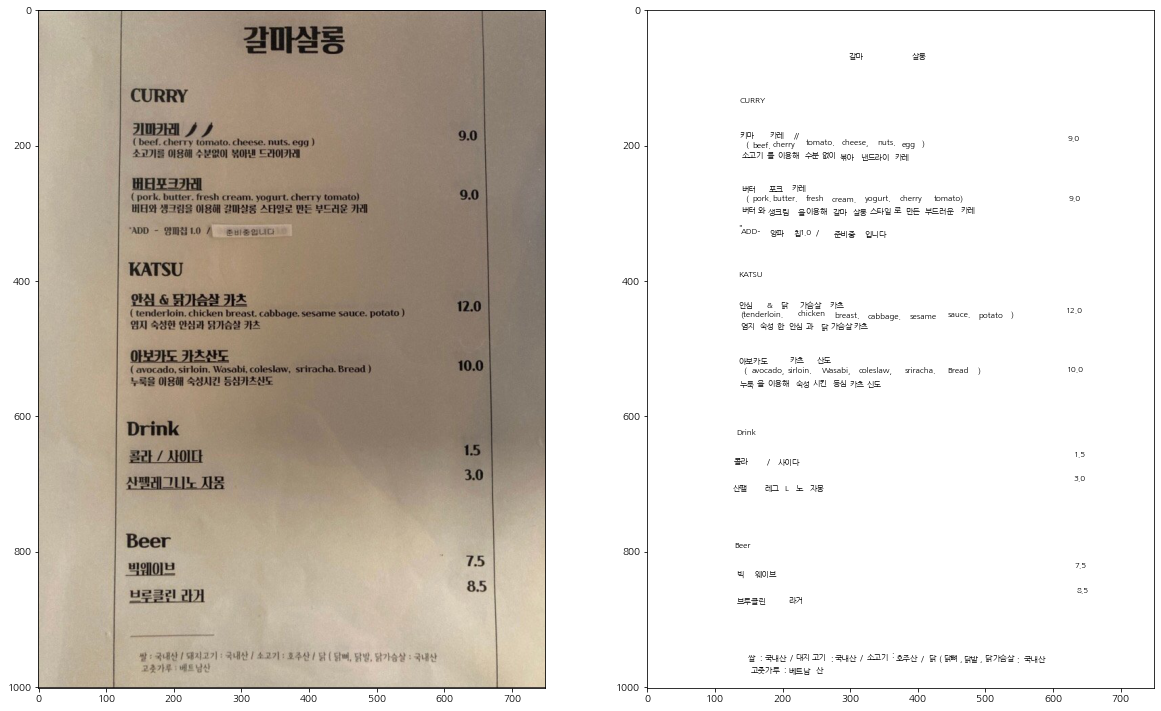

In [78]:
plt.figure(figsize = (20, 30))

plt.subplot(1, 2, 1)
plt.imshow(img.imread(img_path + img_list[2]))

plt.subplot(1, 2, 2)
plt.imshow(white_img)
for key, val in img_dict.items():
    plt.text(key[3][0], key[3][1], val, fontsize=8)
    
plt.show()

**스바라시라멘**

In [79]:
img_dict = detect_text(img_path + img_list[3])

In [80]:
white_img = img.imread(img_path + img_list[3])
white_img = np.ones(img.imread(img_path + img_list[3]).shape)

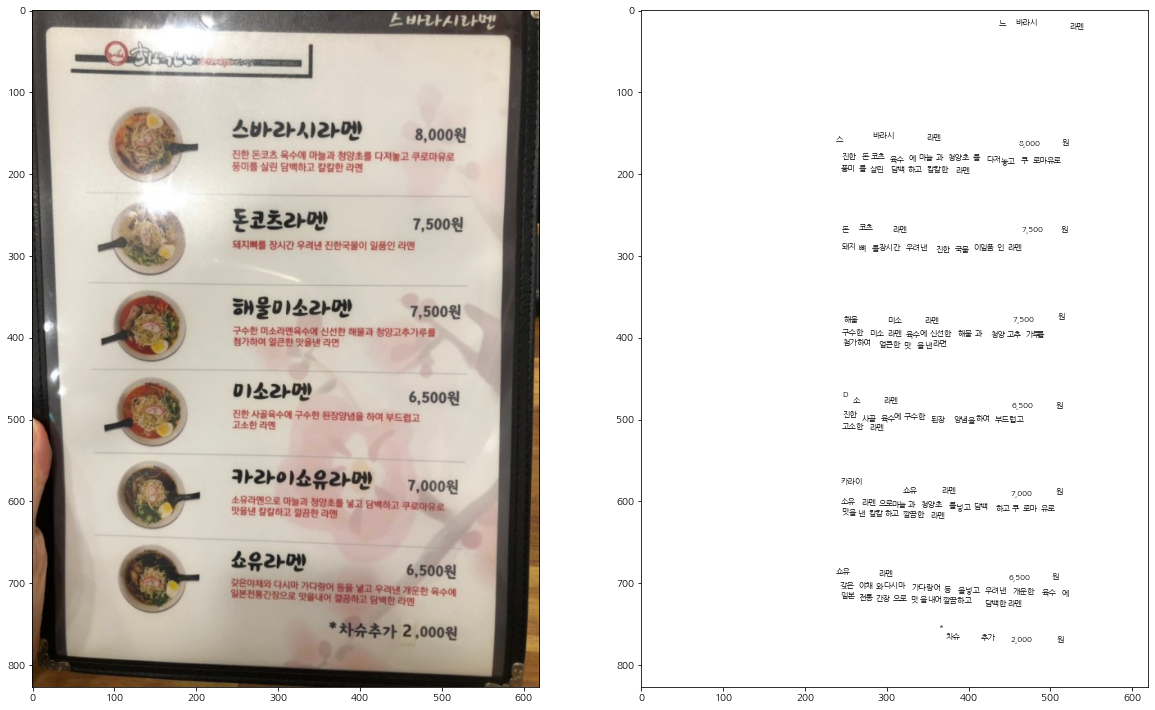

In [81]:
plt.figure(figsize = (20, 30))

plt.subplot(1, 2, 1)
plt.imshow(img.imread(img_path + img_list[3]))

plt.subplot(1, 2, 2)
plt.imshow(white_img)
for key, val in img_dict.items():
    plt.text(key[3][0], key[3][1], val, fontsize=8)
    
plt.show()

**설해돈**

In [86]:
img_dict = detect_text(img_path + img_list[4])

In [87]:
white_img = img.imread(img_path + img_list[4])
white_img = np.ones(img.imread(img_path + img_list[4]).shape)

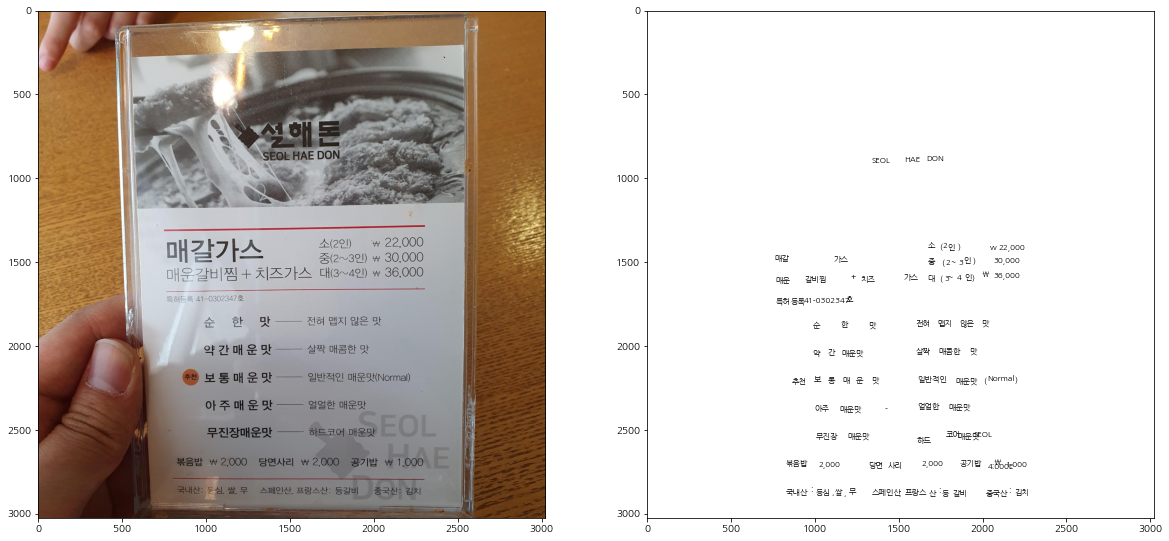

In [88]:
plt.figure(figsize = (20, 30))

plt.subplot(1, 2, 1)
plt.imshow(img.imread(img_path + img_list[4]))

plt.subplot(1, 2, 2)
plt.imshow(white_img)
for key, val in img_dict.items():
    plt.text(key[3][0], key[3][1], val, fontsize=8)
    
plt.show()

**동백카츠**

In [89]:
img_dict = detect_text(img_path + img_list[5])

In [90]:
white_img = img.imread(img_path + img_list[5])
white_img = np.ones(img.imread(img_path + img_list[5]).shape)

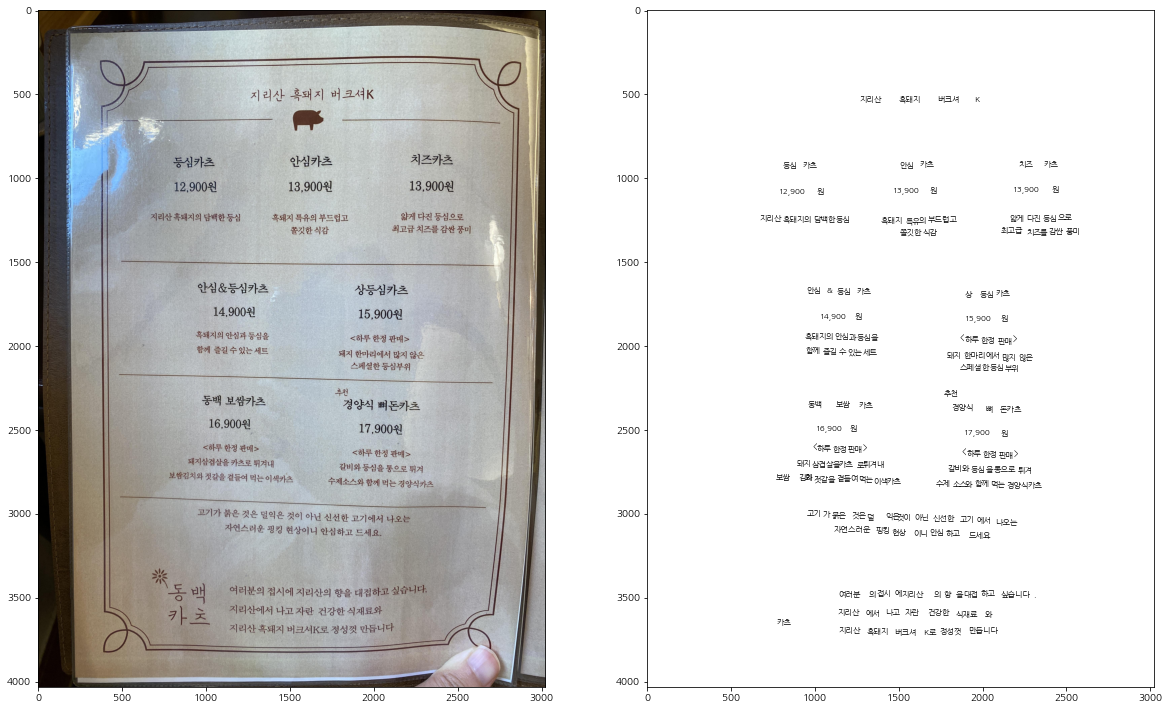

In [91]:
plt.figure(figsize = (20, 30))

plt.subplot(1, 2, 1)
plt.imshow(img.imread(img_path + img_list[5]))

plt.subplot(1, 2, 2)
plt.imshow(white_img)
for key, val in img_dict.items():
    plt.text(key[3][0], key[3][1], val, fontsize=8)
    
plt.show()

**까스만**

In [92]:
img_dict = detect_text(img_path + img_list[6])

In [93]:
white_img = img.imread(img_path + img_list[6])
white_img = np.ones(img.imread(img_path + img_list[6]).shape)

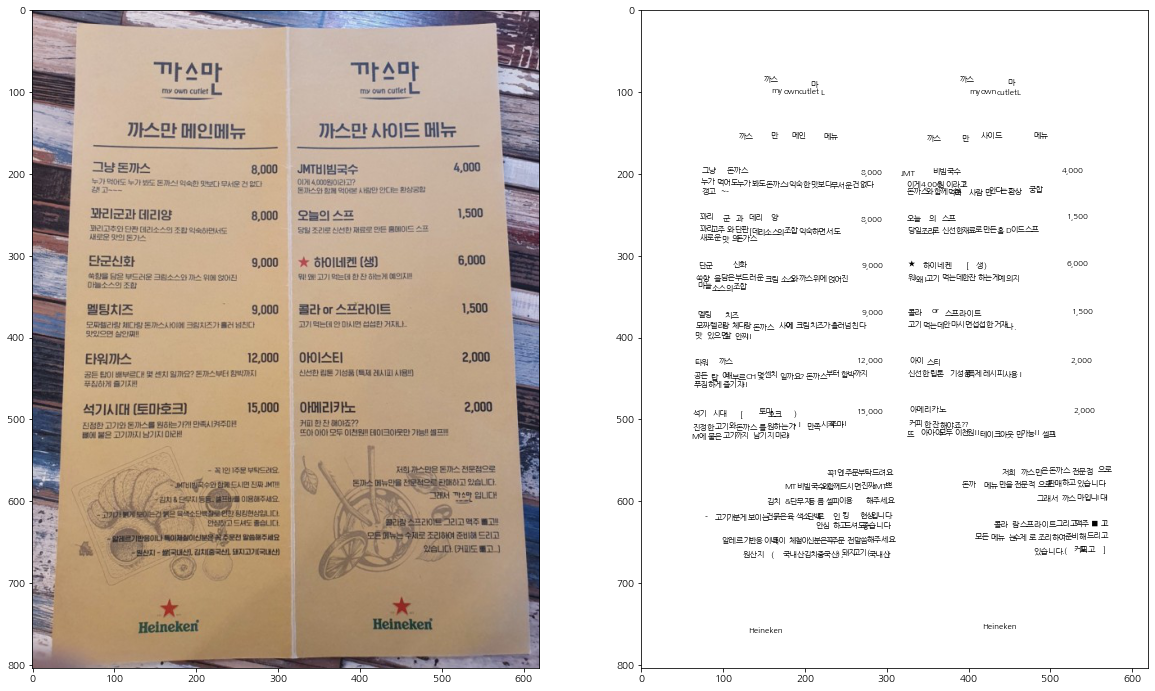

In [94]:
plt.figure(figsize = (20, 30))

plt.subplot(1, 2, 1)
plt.imshow(img.imread(img_path + img_list[6]))

plt.subplot(1, 2, 2)
plt.imshow(white_img)
for key, val in img_dict.items():
    plt.text(key[3][0], key[3][1], val, fontsize=8)
    
plt.show()

**도군샤브**

In [95]:
img_dict = detect_text(img_path + img_list[7])

In [96]:
white_img = img.imread(img_path + img_list[7])
white_img = np.ones(img.imread(img_path + img_list[7]).shape)

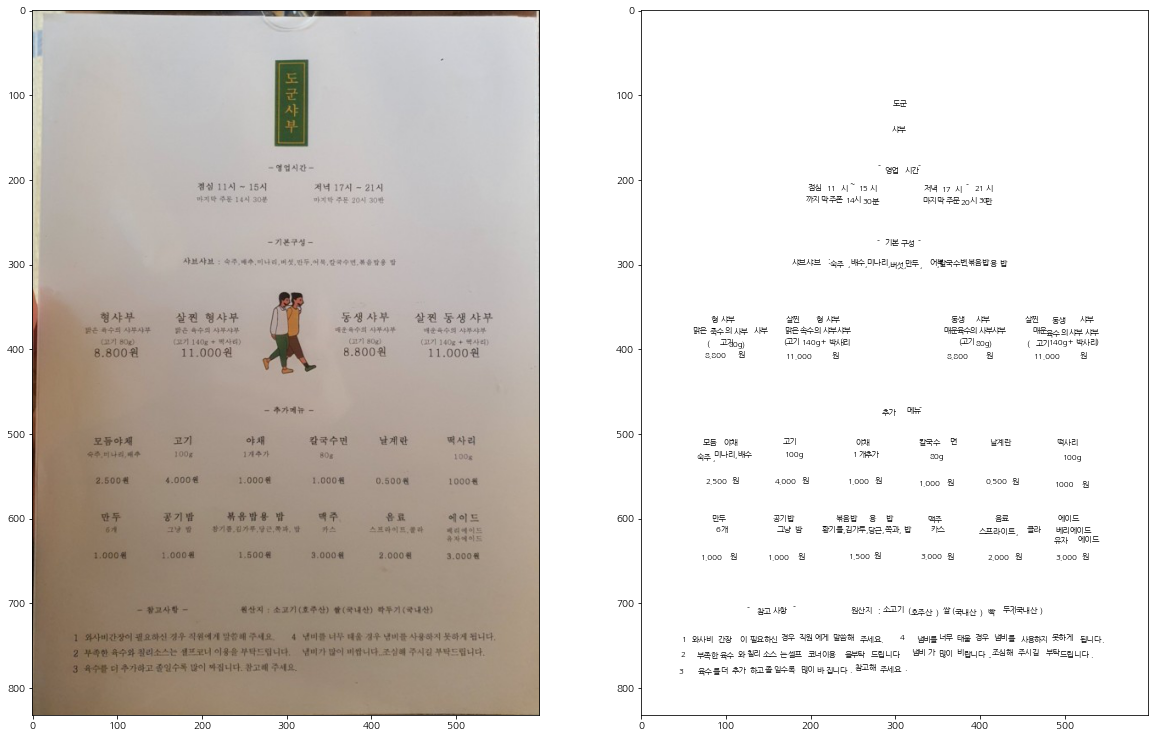

In [97]:
plt.figure(figsize = (20, 30))

plt.subplot(1, 2, 1)
plt.imshow(img.imread(img_path + img_list[7]))

plt.subplot(1, 2, 2)
plt.imshow(white_img)
for key, val in img_dict.items():
    plt.text(key[3][0], key[3][1], val, fontsize=8)
    
plt.show()

## [ 결과 - 루브릭 ]
**1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?**
- 목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용합니다. :)  

**2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?** 
- 평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었습니다. (5. 모델비교 해당) :)
  
**3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?**
- 8장의 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었습니다. :)